In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\MY\GitHubRS\SalaryPrediction\data\cleaned\cleaned_data.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age of Company,python,R,spark,aws,excel,job_simp,seniority,desc_len,No. of Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,52,1,1,0,0,1,data scientist,na,354,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,41,1,1,0,0,0,data scientist,na,671,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,15,1,1,1,0,1,data scientist,na,490,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,60,1,1,0,0,0,data scientist,na,516,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,27,1,1,0,0,1,data scientist,na,378,3


<Axes: >

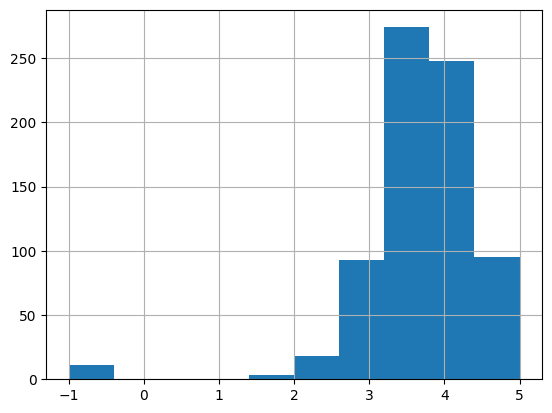

In [4]:
df['Rating'].hist()

<Axes: >

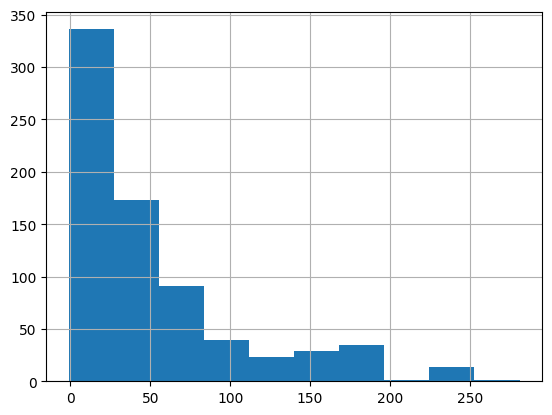

In [6]:
df['Age of Company'].hist()

<Axes: >

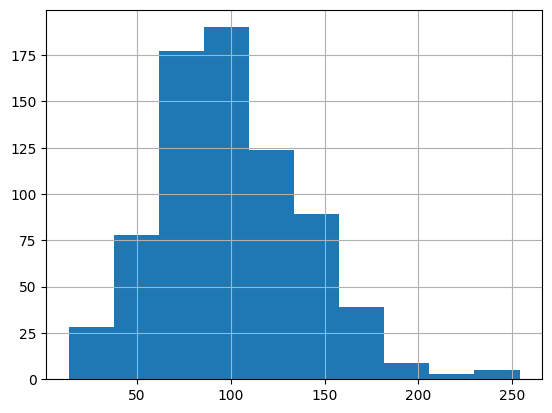

In [7]:
df['Avg Salary'].hist()

In [9]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer_provide_salary', 'Max Salary', 'Min Salary',
       'Avg Salary', 'company', 'job_state', 'same_state', 'Age of Company',
       'python', 'R', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'No. of Competitors'],
      dtype='object')

<Axes: >

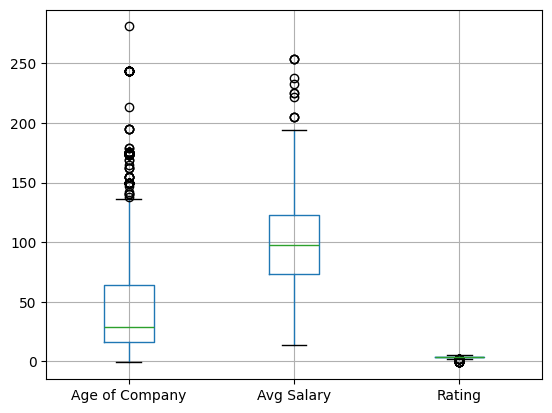

In [11]:
df.boxplot(column=['Age of Company','Avg Salary','Rating'])

<Axes: >

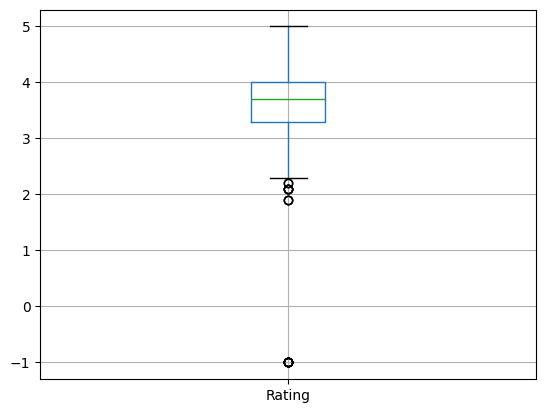

In [12]:
df.boxplot(column=['Rating'])

In [20]:
corr_matrix=df[['Age of Company','Avg Salary','Rating','desc_len','No. of Competitors']].corr()

<Axes: >

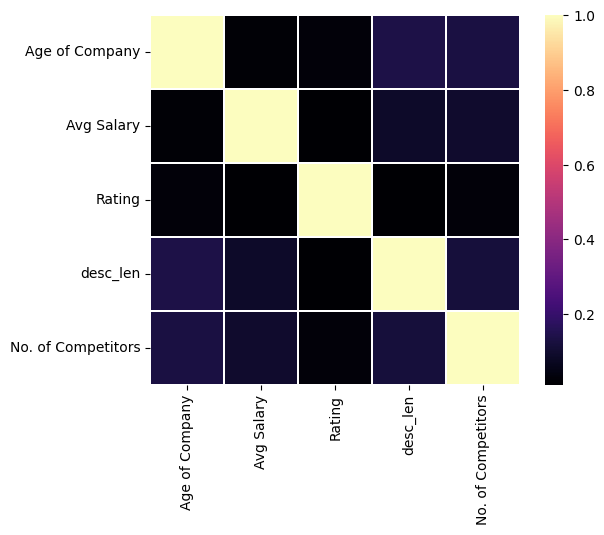

In [21]:
sns.heatmap(corr_matrix, cmap="magma", square=True, linewidth=0.3, linecolor="white")


In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer_provide_salary', 'Max Salary', 'Min Salary',
       'Avg Salary', 'company', 'job_state', 'same_state', 'Age of Company',
       'python', 'R', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'No. of Competitors'],
      dtype='object')

In [31]:
df_cat=df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','job_simp','seniority']]

C:\Users\hp\AppData\Local\Temp\ipykernel_34440\3167673638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_34440\3167673638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_34440\3167673638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_34440\3167673638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

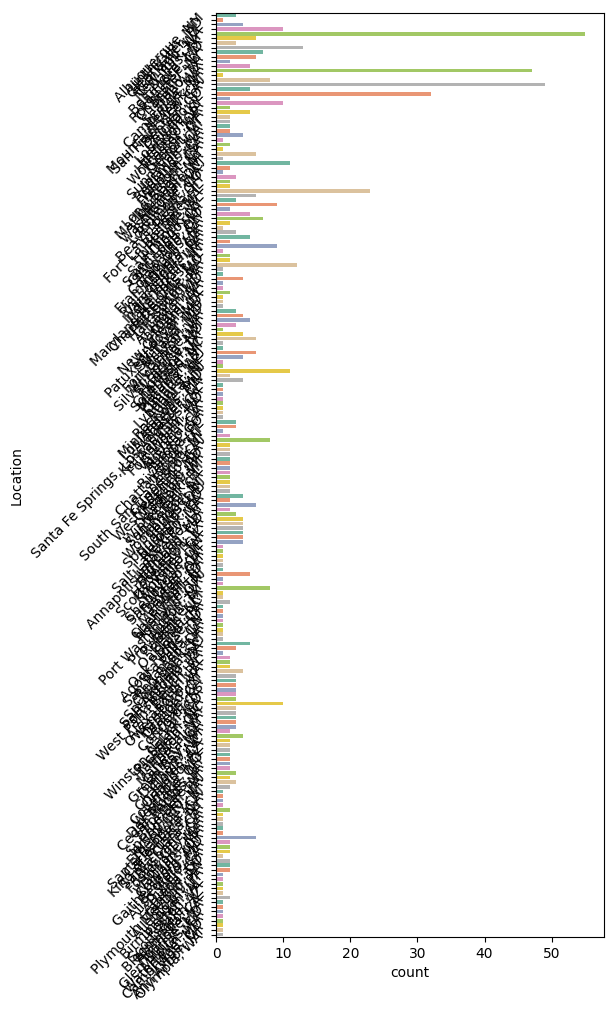

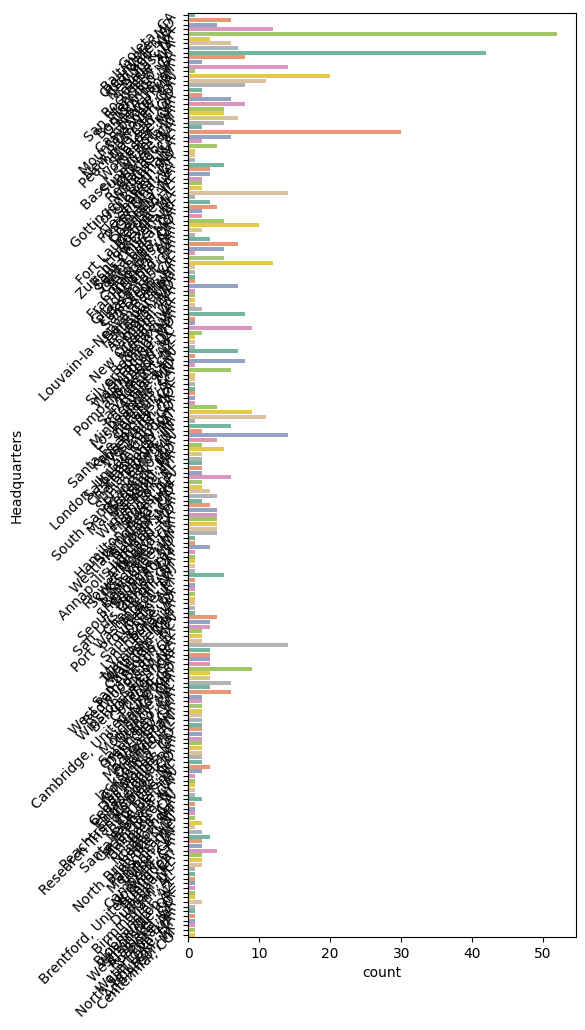

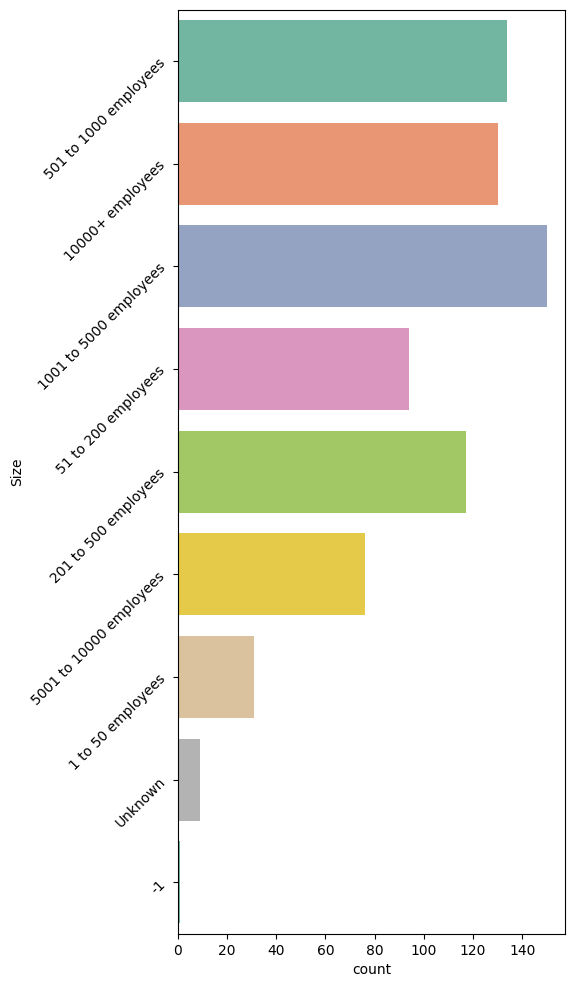

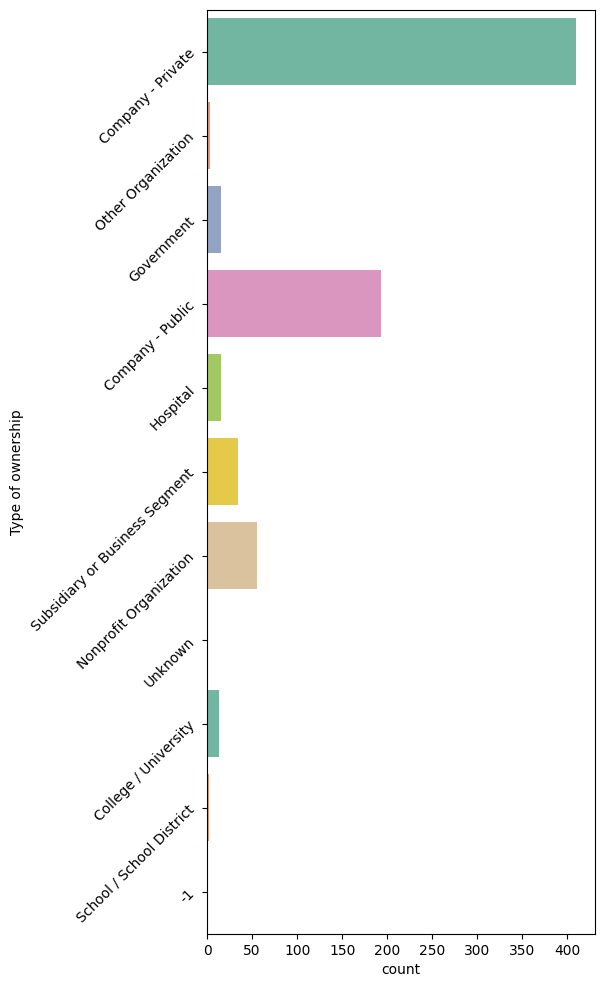

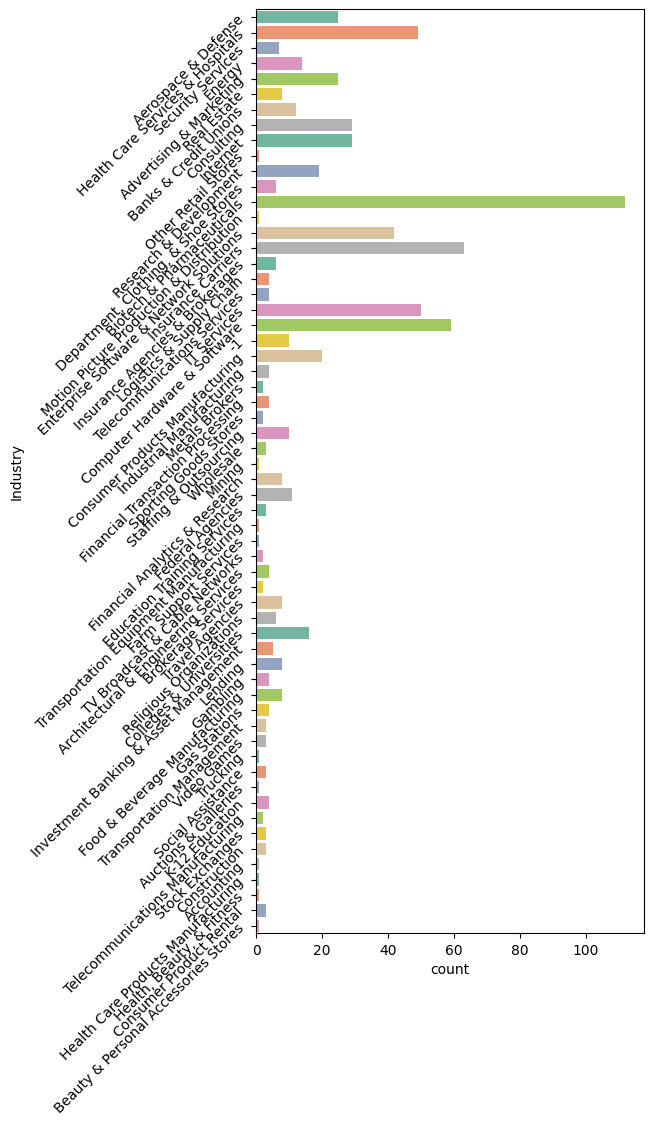

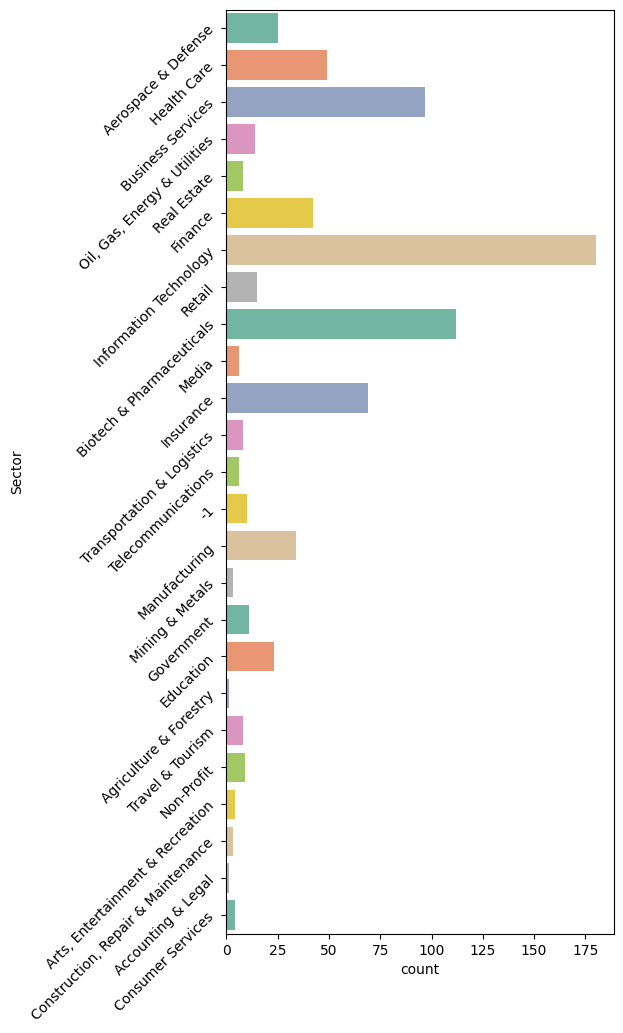

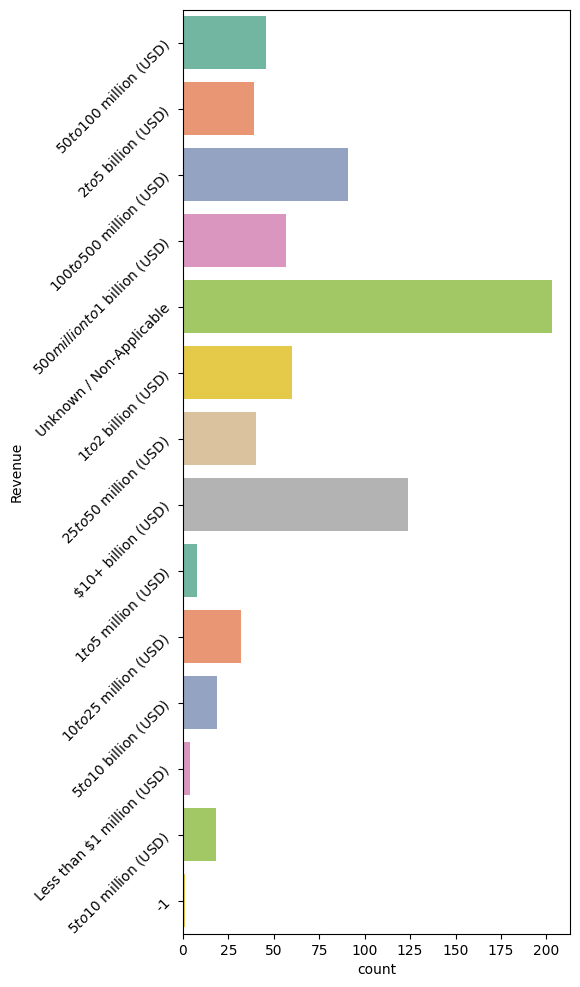

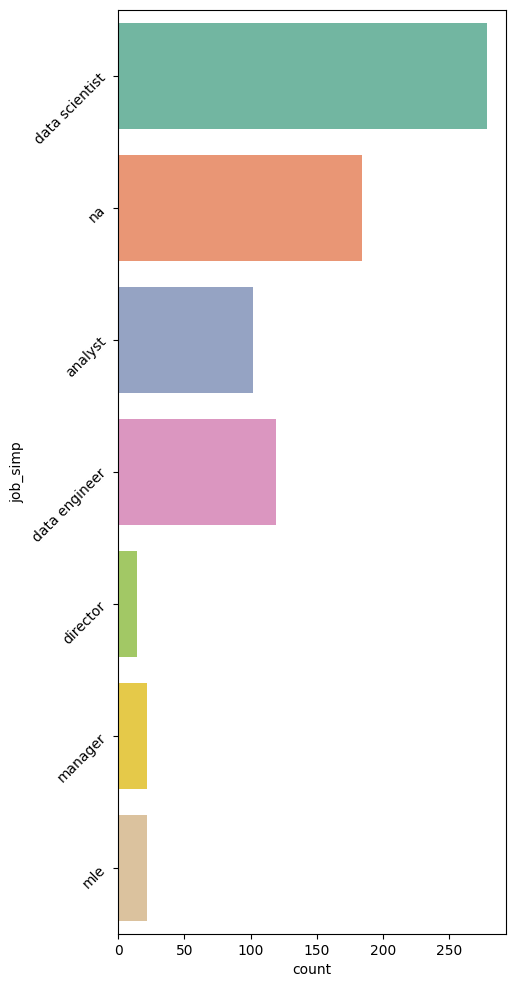

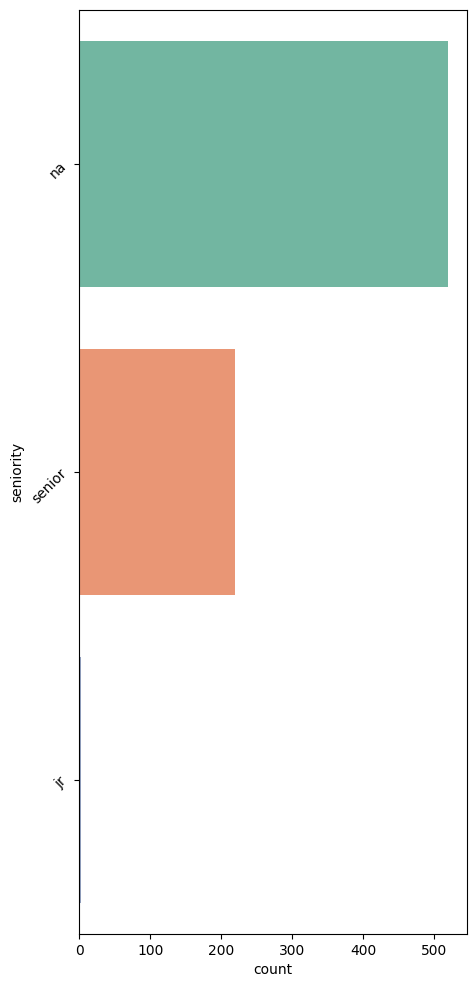

In [33]:
for col in df_cat.columns:
    plt.figure(figsize=(5,12))
    plt.yticks(rotation=45)
    sns.countplot(df[col],palette='Set2')


In [36]:
pd.pivot_table(df, index=['job_simp','seniority'],values='Avg Salary')

Avg Salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

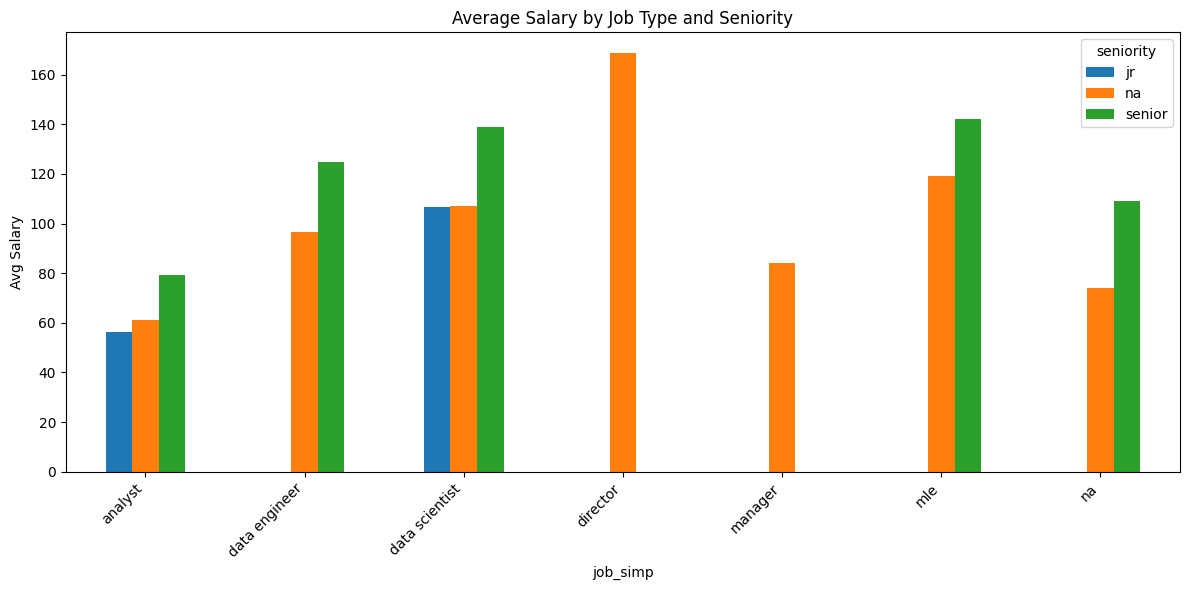

In [37]:
# create the same pivot in a wide format and plot it as grouped bars
pivot = pd.pivot_table(df, index='job_simp', columns='seniority', values='Avg Salary', aggfunc='mean')
pivot.plot(kind='bar', figsize=(12,6))
plt.ylabel('Avg Salary')
plt.title('Average Salary by Job Type and Seniority')
plt.xticks(rotation=45, ha='right')
plt.legend(title='seniority')
plt.tight_layout()

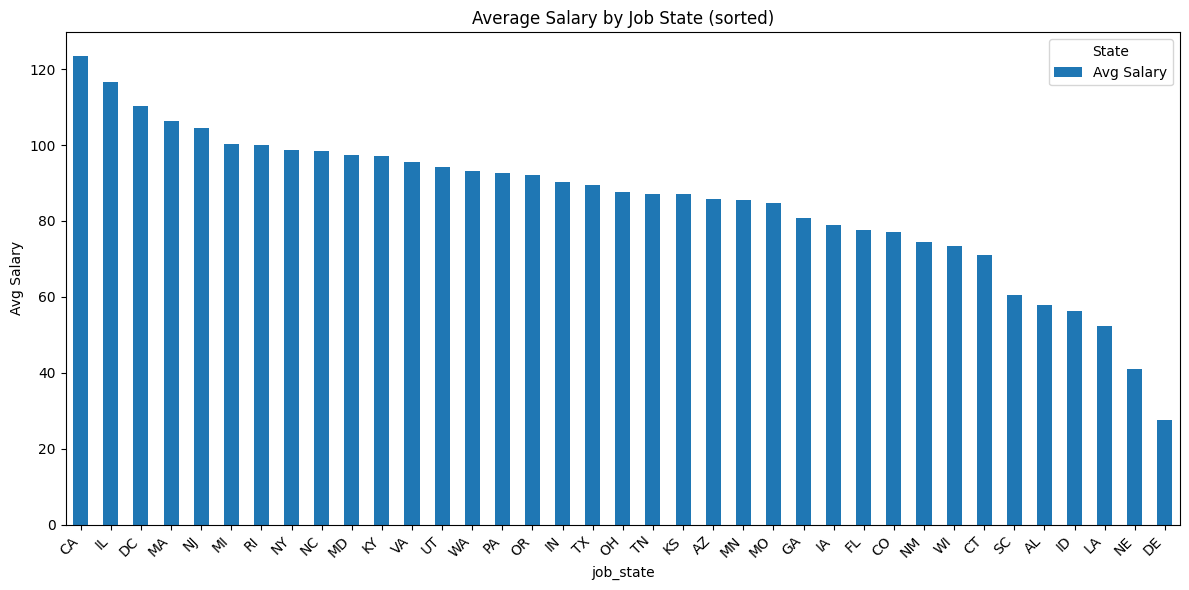

In [41]:
pivot2 = pd.pivot_table(df, index='job_state', values='Avg Salary', aggfunc='mean')
pivot2 = pivot2.sort_values(by='Avg Salary', ascending=False)
pivot2.plot(kind='bar', figsize=(12,6))
plt.ylabel('Avg Salary')
plt.title('Average Salary by Job State (sorted)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State')
plt.tight_layout()

In [43]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [53]:
words= ' '.join(df['Job Description'])

def punctuation_stop(text): 
    word_tokens=word_tokenize(text)
    filtered=[word.lower() for word in word_tokens if  word.isalpha() and word not in stopwords.words('english')]
    return filtered


In [54]:
words_filtered=punctuation_stop(words)

In [55]:
words_filtered

['data',
 'scientist',
 'location',
 'albuquerque',
 'nm',
 'education',
 'required',
 'bachelor',
 'degree',
 'required',
 'preferably',
 'math',
 'engineering',
 'business',
 'sciences',
 'skills',
 'required',
 'bachelor',
 'degree',
 'relevant',
 'field',
 'math',
 'data',
 'analysis',
 'database',
 'computer',
 'science',
 'artificial',
 'intelligence',
 'ai',
 'three',
 'years',
 'experience',
 'credit',
 'master',
 'degree',
 'five',
 'years',
 'experience',
 'credit',
 'applicant',
 'proficient',
 'use',
 'power',
 'bi',
 'tableau',
 'python',
 'matlab',
 'microsoft',
 'word',
 'powerpoint',
 'excel',
 'working',
 'knowledge',
 'ms',
 'access',
 'lms',
 'sas',
 'data',
 'visualization',
 'tools',
 'strong',
 'algorithmic',
 'aptitude',
 'excellent',
 'verbal',
 'written',
 'communication',
 'skills',
 'quantitative',
 'analytical',
 'skills',
 'required',
 'applicant',
 'must',
 'able',
 'work',
 'team',
 'environment',
 'citizenship',
 'ability',
 'obtain',
 'dod',
 'secret',


In [56]:
text=' '.join(words_filtered)


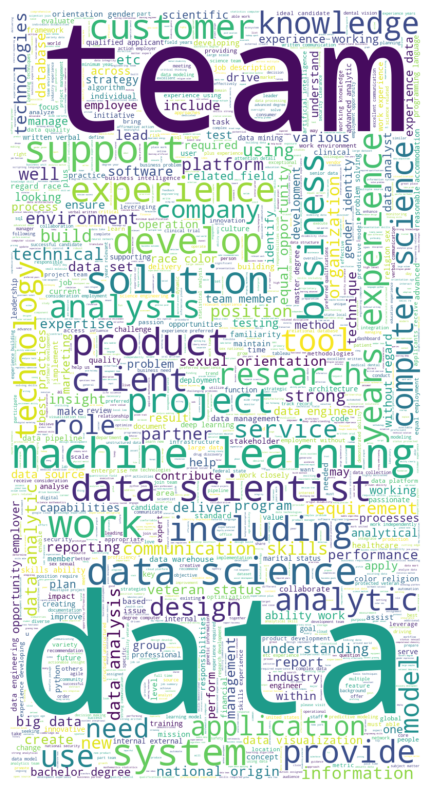

In [58]:
wc=WordCloud(background_color='white', random_state=42, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()